In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import kid_readout.roach.heterodyne

In [3]:
ri = kid_readout.roach.heterodyne.RoachHeterodyne(adc_valon='/dev/ttyUSB0')

In [4]:
ri.set_lo(1250.)

In [5]:
ri.set_tone_freqs(np.array([1270.]),nsamp=2**16)

bank_offset= 0 start_offset= 0 start_offset_bytes= 0
writing DRAM bank 0



array([ 1270.])

In [6]:
ri.set_dac_atten(60.)

In [7]:
x,y = ri.get_raw_adc()

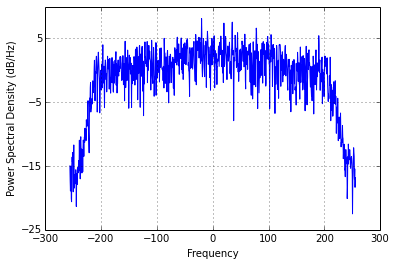

In [8]:
blah = psd(x+1j*y,Fs=512.,NFFT=4096/4)

In [9]:
ri.select_fft_bins([0])

In [10]:
ri.set_fft_gain(4)

In [13]:
d,addr = ri.get_data(2)

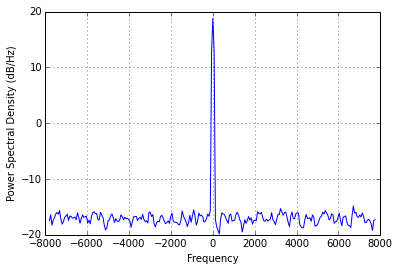

In [14]:
blah = psd(d[:,0],Fs=256e6/2**14)

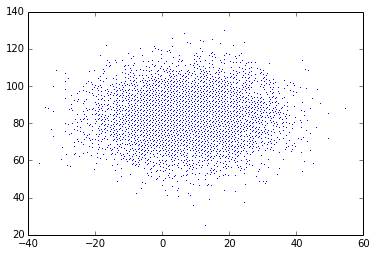

In [15]:
plot(d.real,d.imag,',')

In [16]:
import time

In [17]:
import sys

In [18]:
start = time.time()
data = []
ts = []
while time.time()-start < 1200:
    ts.append(time.time())
    d,addr = ri.get_data(2)
    data.append(d.mean())
    print 20*np.log10(np.abs(data[-1])),
    sys.stdout.flush()
    time.sleep(2)

38.421561718 38.4267902374 38.4396219254 38.438937664 38.4306406975 38.4233951569 38.4390068054 38.407831192 38.3960056305 38.4546875954 38.4408283234 38.415555954 38.406419754 38.4125518799 38.4190702438 38.4427857399 38.4103536606 38.4212875366 38.391919136 38.4219050407 38.4104895592 38.4430074692 38.4129309654 38.4005975723 38.4383440018 38.4101319313 38.4001302719 38.434677124 38.3903956413 38.4181785583 38.4173822403 38.395049572 38.4097719193 38.3840084076 38.4387493134 38.4158277512 38.421895504 38.4360313416 38.4162330627 38.391752243 38.4154510498 38.423409462 38.4293985367 38.4219884872 38.4302544594 38.4301590919 38.4254264832 38.4363985062 38.4259390831 38.4242391586 detected mcnt overflow None 8037026 0 2048 0 16 8037026
38.3935570717 38.4678649902 38.4160757065 38.4239435196 38.4200930595 38.4211111069 38.4197592735 38.4388804436 38.4033513069 38.4232711792 38.4020662308 38.440489769 38.437256813 38.4053206444 38.4517550468 38.414721489 38.4318304062 38.4231162071 38.439

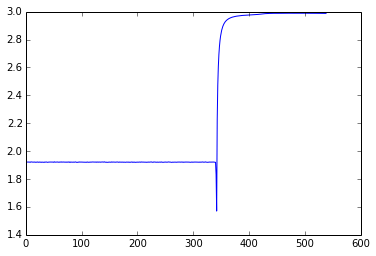

In [19]:
plot(np.log10(np.abs(data)))

In [22]:
np.savez('/data/readout/archive/2015-12-12-measure-Tc-at-1270-MHz-ASU-Clark-Dual-pol.npz',epoch=np.array(ts),s21=data)

In [20]:
data = np.array(data)

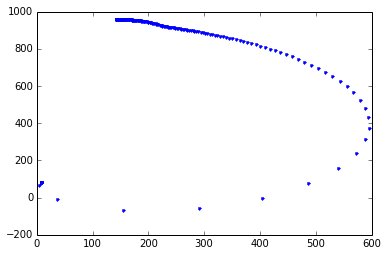

In [21]:
plot(data.real,data.imag,'.')

In [28]:
import kid_readout.utils.starcryo_temps

updated file list


In [33]:
primary_package_temperature, secondary_package_temperature, primary_load_temperature, secondary_load_temperature = kid_readout.utils.starcryo_temps.get_temperatures_at(np.array(ts))

In [40]:
rcParams['font.size'] = 18

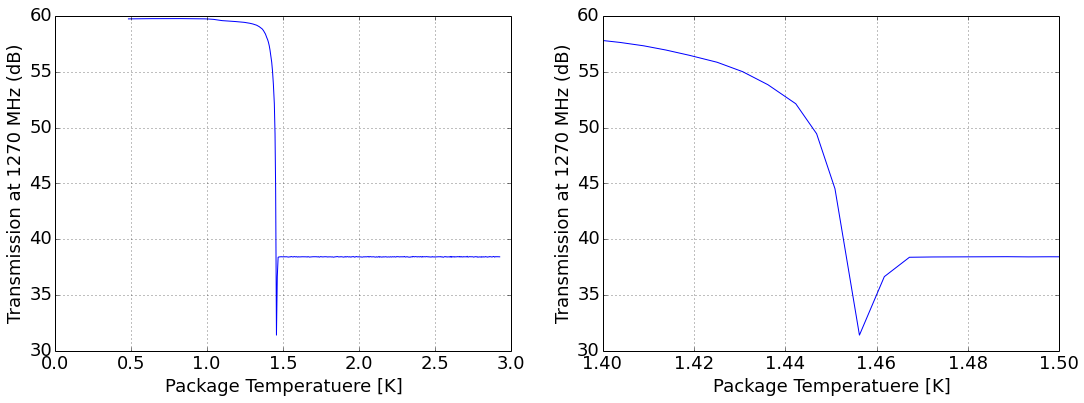

In [41]:
figure(figsize=(18,6))
subplot(121)
plot(primary_package_temperature,20*np.log10(np.abs(data)))
xlabel('Package Temperatuere [K]')
ylabel('Transmission at 1270 MHz (dB)')
grid()
subplot(122)
plot(primary_package_temperature,20*np.log10(np.abs(data)))
xlim(1.4,1.5)
xlabel('Package Temperatuere [K]')
ylabel('Transmission at 1270 MHz (dB)')
grid()